In [1]:
# Visualization Stuff

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import colors
import matplotlib.gridspec as gridspec
from mne.viz import circular_layout, plot_connectivity_circle
import itertools
%pylab inline 

from matplotlib.backends.backend_pdf import PdfPages
from IPython.display import Image,HTML,clear_output,display as d
from nilearn.plotting import plot_roi,plot_anat

import os;
import os,sys,pandas as pd,numpy as np, scipy


/Users/AmandaE/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')

Populating the interactive namespace from numpy and matplotlib


pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy


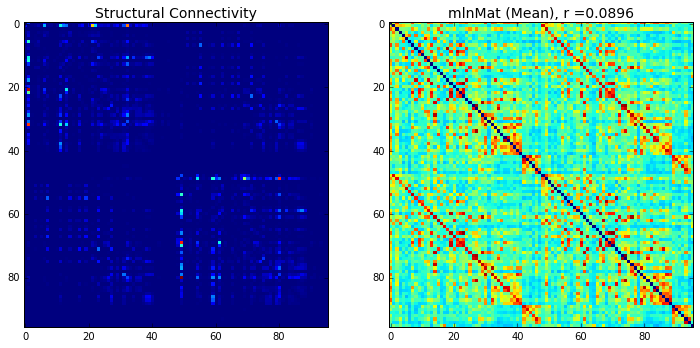

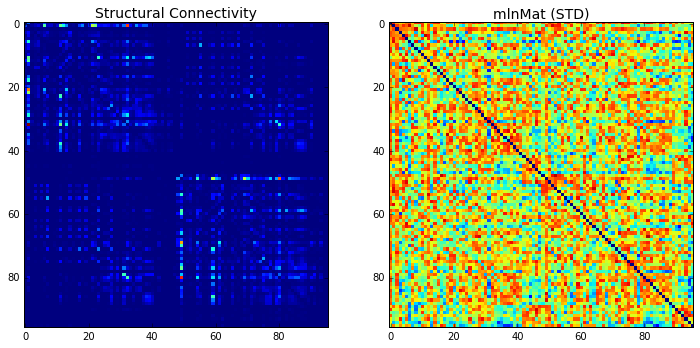

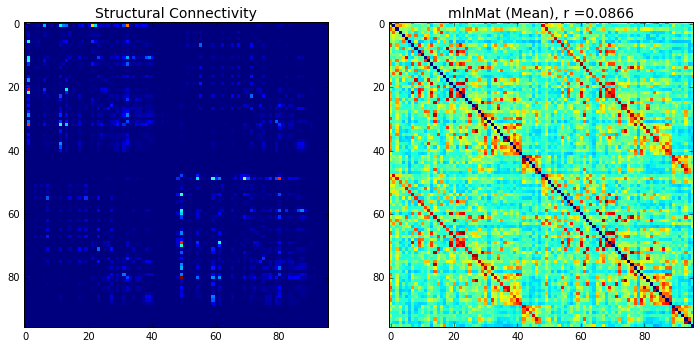

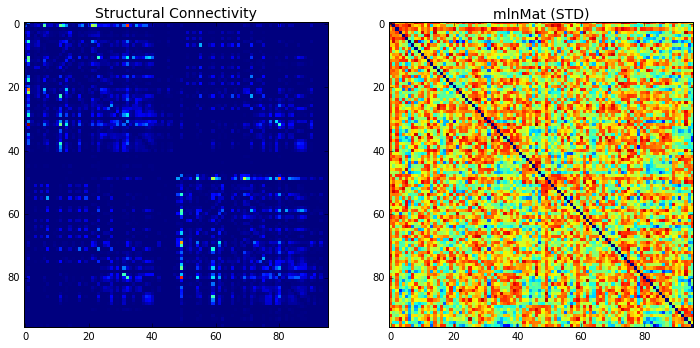

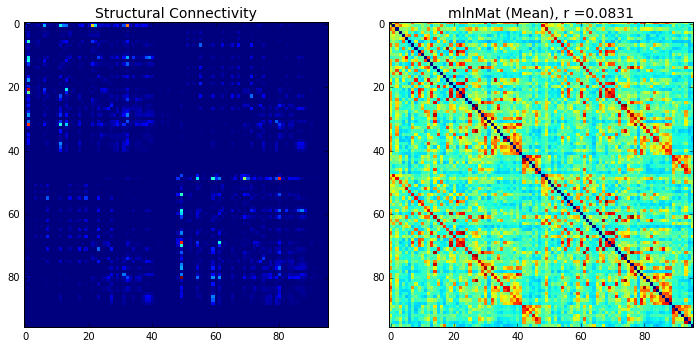

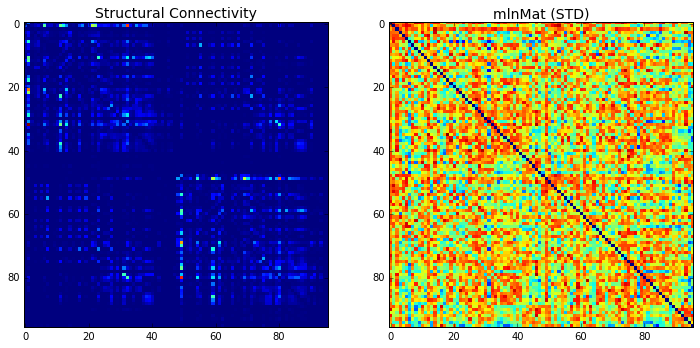

In [9]:
## Parameters

## Things to change for BMs vs. MUL:
    # filename: Tout --> Adp, FRN_G1_tak
    # pdf: MUL_
    # scipy.io.savemat: _MUL (x3) 
    # meas: mlnMat

win = ['50', '70', '90']
subID = np.loadtxt('subjlist.txt')
# meas = ['BCorrU','BCorrD', 'BCohF','BTED']
meas = ['mlnMat']
resultsname = 'fc_abide_jan20'
nchan = 96

allR = np.zeros((np.shape(win)[0],np.shape(meas)[0]))

dir_current = os.getcwd()
results_dir_all = dir_current + '/mlnData/' + resultsname + '/'
outdir = results_dir_all + 'vizresults/'
if not os.path.isdir(outdir): os.makedirs(outdir)

for w in range(np.shape(win)[0]):
    
    # pdf=PdfPages(outdir + 'avg_Win' + win[w] + '.pdf') 
    pdf=PdfPages(outdir + 'MUL_avg_Win' + win[w] + '.pdf') 

    for i in range(np.shape(meas)[0]):
        
        avgsim = np.zeros((nchan,nchan,np.shape(subID)[0]))
        avgsc = np.zeros((nchan,nchan,np.shape(subID)[0]))
        
        for s in range(np.shape(subID)[0]):
        
            results_dir = dir_current + '/mlnData/' + resultsname + '/' + 'Win' + win[w] +'/ToutResults/'
            # filename = 'Tout_' + win[w] + '_' + str(int(subID[s]))
            filename = 'Adp_' + win[w] + '_' + str(int(subID[s]))+'FRN_G1_tak'

            subfile = results_dir + filename + '.mat'
            matdata = scipy.io.loadmat(subfile)
            
            sc = scipy.io.loadmat(results_dir_all + 'data/' + str(int(subID[s])) + '.mat')
            sc = sc['Connectivity']
            
            avgsc[:,:,s] = sc

            cdata = matdata[meas[i]]
            cdata = np.absolute(np.mean(cdata,axis=2))
            
            avgsim[:,:,s] = cdata
            
        sc = np.mean(avgsc,axis=2)
        cdata = np.mean(avgsim,axis=2)
        # scipy.io.savemat(outdir+'avg_mean_Win'+win[w]+'_'+meas[i]+'.mat',mdict={'sc':sc,'cdata':cdata})
        scipy.io.savemat(outdir+'MUL_avg_mean_Win'+win[w]+'_'+meas[i]+'.mat',mdict={'sc':sc,'cdata':cdata})

        fig = figure(figsize = (12, 6))

        ax1=subplot(121);
        plt.imshow(sc,interpolation='nearest');
        plt.title('Structural Connectivity',fontsize=14);

        ax1=subplot(122);
        plt.imshow(cdata,interpolation='nearest');

        scv = sc;
        for r in range(scv.shape[0]):
                scv[r:,r]=numpy.inf
        scv = scv[~numpy.isinf(scv)]

        cdatav = cdata;
        for r in range(cdatav.shape[0]):
            cdatav[r:,r]=numpy.inf
        cdatav = cdatav[~numpy.isinf(cdatav)]

        r = corrcoef(scv.ravel(), cdatav.ravel())[1, 0]
        r = round(r,4)
        allR[w,i] = r;
        r = str(r)

        plt.title(meas[i] + ' (Mean), r =' + r, fontsize=14);

        pdf.savefig(fig)
        plt.show()
        
        sc = np.std(avgsc,axis=2)
        cdata = np.std(avgsim,axis=2)
        # scipy.io.savemat(outdir+'avg_std_Win'+win[w]+'_'+meas[i]+'.mat',mdict={'sc':sc,'cdata':cdata})
        scipy.io.savemat(outdir+'MUL_avg_std_Win'+win[w]+'_'+meas[i]+'.mat',mdict={'sc':sc,'cdata':cdata})
        
        fig = figure(figsize = (12, 6))

        ax1=subplot(121);
        plt.imshow(sc,interpolation='nearest');
        plt.title('Structural Connectivity',fontsize=14);

        ax1=subplot(122);
        plt.imshow(cdata,interpolation='nearest');

        plt.title(meas[i] + ' (STD)', fontsize=14);

        pdf.savefig(fig)
        plt.show()


    pdf.close()


In [10]:
# scipy.io.savemat(results_dir_all+'allR_avg.mat',mdict={'allR':allR})
scipy.io.savemat(results_dir_all+'allR_avg_MUL.mat',mdict={'allR':allR})